Imports


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

Reading in the final dataframe with 2000 entries, 1000 from Minimalism and 1000 from Declutter subreddits for EDA.

In [9]:
final_df = pd.read_csv('../files/final_df.csv')
final_df.head()

,title,text,subreddit,created_utc
0,Kitchen Before and After,I've finally finished decluttering and cleanin...,declutter,1.609520e+09
1,How is there still so much stuff?!,"I’ve been decluttering all of 2020, as well as...",declutter,1.609607e+09
2,"I put ""due-dates"" on clothes that I haven't wo...",https://imgur.com/a/Y5BdBiT,declutter,1.609780e+09
3,Clothes that fit but are old/aren’t me anymore,Update: \nSo I listed 4 dresses to the free si...,declutter,1.610106e+09
4,Decluttering the freezer. Cooked 5 chickens do...,"Just as the title says, I’m trying to clear ou...",declutter,1.610158e+09


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1694 non-null   object 
 1   text         1676 non-null   object 
 2   subreddit    1694 non-null   object 
 3   created_utc  1694 non-null   float64
dtypes: float64(1), object(3)
memory usage: 53.1+ KB


In [11]:
print(final_df.isnull().sum())

title           0
text           18
subreddit       0
created_utc     0
dtype: int64


There are 26 missing values in text part in 2000 of the entries, which is not a lot but still I would like to know which subreddit has the highest missing. 

In [12]:
missing_by_subreddit = final_df.groupby('subreddit')['text'].apply(lambda x: x.isnull().sum())
print(missing_by_subreddit)

subreddit
declutter     9
minimalism    9
Name: text, dtype: int64


There is 17 missing in the Minimalism subreddit and 9 in declutter. I would like to fill the text with no text for Declutter and unknown content for Minimalism subreddit, so they are still distinct despite not having anything in the text

In [13]:
final_df.loc[(final_df['subreddit'] == 'declutter') & (final_df['text'].isnull()), 'text'] = 'No Text'

In [14]:
final_df.loc[(final_df['subreddit'] == 'minimalism') & (final_df['text'].isnull()), 'text'] = 'Unknown Content'

In [15]:
#checking
print(final_df.isnull().sum())

title          0
text           0
subreddit      0
created_utc    0
dtype: int64


In [16]:
final_df.head()

,title,text,subreddit,created_utc
0,Kitchen Before and After,I've finally finished decluttering and cleanin...,declutter,1.609520e+09
1,How is there still so much stuff?!,"I’ve been decluttering all of 2020, as well as...",declutter,1.609607e+09
2,"I put ""due-dates"" on clothes that I haven't wo...",https://imgur.com/a/Y5BdBiT,declutter,1.609780e+09
3,Clothes that fit but are old/aren’t me anymore,Update: \nSo I listed 4 dresses to the free si...,declutter,1.610106e+09
4,Decluttering the freezer. Cooked 5 chickens do...,"Just as the title says, I’m trying to clear ou...",declutter,1.610158e+09


In [17]:
print(final_df.columns)

Index(['title', 'text', 'subreddit', 'created_utc'], dtype='object')


I would also like to see top 20 word sof each subreddit. 

In [18]:
minimalism_df = final_df[final_df['subreddit'] == 'minimalism']
declutter_df = final_df[final_df['subreddit'] == 'declutter']

def get_top_words(texts, top_n=20):
    all_words = " ".join(texts.dropna()).split()
    
    #convert to use value_counts
    word_series = pd.Series(all_words)
    top_words = word_series.value_counts().head(top_n)
    
    return top_words

top_words_minimalism_text = get_top_words(minimalism_df['text'], 20)
top_words_declutter_text = get_top_words(declutter_df['text'], 20)

In [19]:
print(top_words_minimalism_text)
print(top_words_declutter_text)



I       3993
to      3156
and     2952
the     2529
a       2486
of      2168
my      1520
in      1181
that    1168
for     1116
have    1035
is       905
it       868
you      788
with     774
but      680
or       601
on       596
just     532
like     522
Name: count, dtype: int64
I       8125
to      6069
and     5421
the     5341
a       4525
of      4329
my      2692
in      2472
that    2374
it      2130
for     2000
have    1932
but     1389
is      1375
you     1250
with    1224
was     1198
so      1122
on      1120
or      1023
Name: count, dtype: int64


Most of the words are the same in both categories, they are also common english word, which brings in the need to use english stop words.

Convert Float into string for lemmatizing.

In [20]:

final_df['text'] = final_df['text'].apply(lambda x: str(x) if isinstance(x, (float, int)) else x)


Lemmatizing!

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def lemmatize_words(text):
    text = text.lower().strip()
    tokens = tokenizer.tokenize(text)

    # Removing stopwords and lemmatizing!
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    clean_text = ' '.join(clean_tokens)
    
    return clean_text



In [26]:
final_df['clean_text'] = final_df['text'].apply(lemmatize_words)
print(final_df[['text', 'clean_text']])
final_df.to_csv('../files/reddit_cleaned.csv', index=False)

                                                   text  \
0     I've finally finished decluttering and cleanin...   
1     I’ve been decluttering all of 2020, as well as...   
2                           https://imgur.com/a/Y5BdBiT   
3     Update: \nSo I listed 4 dresses to the free si...   
4     Just as the title says, I’m trying to clear ou...   
...                                                 ...   
1689  I'm 23m and have become increasingly disenfran...   
1690  I am in college and looking to start upgrading...   
1691  Isnt it stupid? I am going through things in m...   
1692  I live in a four season state what are your gu...   
1693  Y'all have any ideas regarding dishes and food...   

                                             clean_text  
0     finally finished decluttering cleaning kitchen...  
1     decluttering 2020 well making small change 5 y...  
2                                http imgur com y5bdbit  
3     update listed 4 dress free site area found nic...  
4

In [27]:
final_df.head()

,title,text,subreddit,created_utc,clean_text
0,Kitchen Before and After,I've finally finished decluttering and cleanin...,declutter,1.609520e+09,finally finished decluttering cleaning kitchen...
1,How is there still so much stuff?!,"I’ve been decluttering all of 2020, as well as...",declutter,1.609607e+09,decluttering 2020 well making small change 5 y...
2,"I put ""due-dates"" on clothes that I haven't wo...",https://imgur.com/a/Y5BdBiT,declutter,1.609780e+09,http imgur com y5bdbit
3,Clothes that fit but are old/aren’t me anymore,Update: \nSo I listed 4 dresses to the free si...,declutter,1.610106e+09,update listed 4 dress free site area found nic...
4,Decluttering the freezer. Cooked 5 chickens do...,"Just as the title says, I’m trying to clear ou...",declutter,1.610158e+09,title say trying clear freezer holiday cook th...


Check top 20 words now!

In [28]:
minimalism_df = final_df[final_df['subreddit'] == 'minimalism']
declutter_df = final_df[final_df['subreddit'] == 'declutter']

def get_top_words(texts, top_n=20):
    all_words = " ".join(texts.dropna()).split()
    
    #convert to use value_counts
    word_series = pd.Series(all_words)
    top_words = word_series.value_counts().head(top_n)
    
    return top_words

top_words_minimalism_text = get_top_words(minimalism_df['clean_text'], 20)
top_words_declutter_text = get_top_words(declutter_df['clean_text'], 20)

Plotting to see the words visually

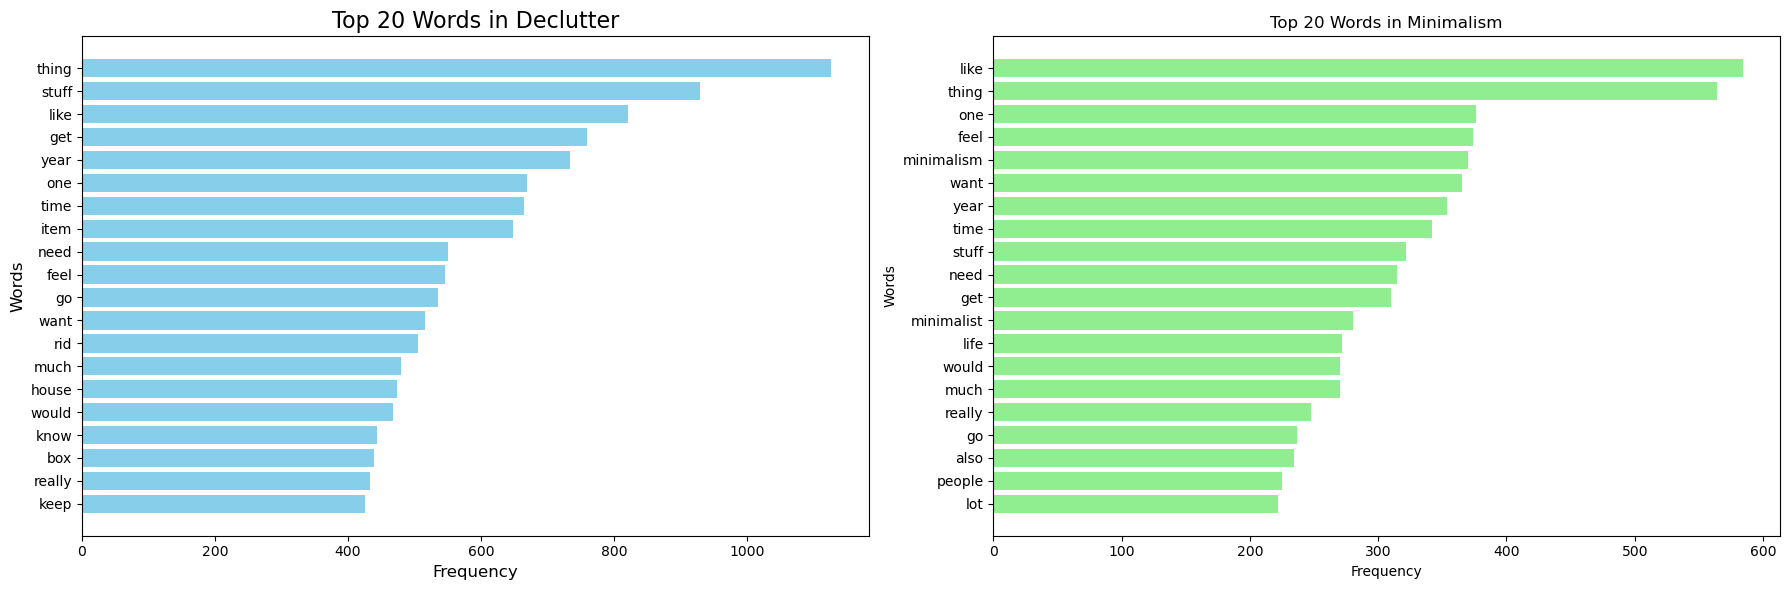

In [29]:
top_words_declutter_text = top_words_declutter_text.sort_values(ascending=True)
top_words_minimalism_text = top_words_minimalism_text.sort_values(ascending=True)


plt.figure(figsize=(18, 6))

# Bar graph for Declutter (Text)
plt.subplot(1, 2, 1) 
plt.barh(top_words_declutter_text.index, top_words_declutter_text.values, color='skyblue')
plt.title('Top 20 Words in Declutter', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)

# Bar graph for Minimalism (Text)
plt.subplot(1, 2, 2) 
plt.barh(top_words_minimalism_text.index, top_words_minimalism_text.values, color='lightgreen')
plt.title('Top 20 Words in Minimalism')
plt.xlabel('Frequency')
plt.ylabel('Words')  
plt.tight_layout()

Among the top 20 words from each subreddits in text; total of 40, only 26 words are unique. This shows that the have related theme. To set this apart and differetiate the subreddit based on words appearing we will be using TF_IDF technique for Natural Language Processing(NLP)